In [2]:
# Importing our usual library panda to read our data
import pandas as pd
import statsmodels.api as sm
import math
data = pd.read_csv('caschool.csv')
x = data['str']
y = data['testscr']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           2.78e-06
Time:                        19:19:25   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        698.9330      9.467     73.825      0.000     680.323     717.543
str           -2.2798      0.480     -4.751      0.000      -3.223      -1.337
==============================================================================
Omnibus:                        5.390   Durbin-Watson:                   0.129
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.589
Skew:                          -0.012   Prob(JB):                        0.166
Kurtosis:                       2.548   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

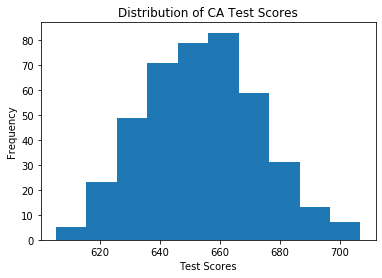

In [3]:
# This is a way to see the data as histogram.
# In the left part (Y coordinates) we see how many times that specific Test score has been achieved by California schools
# On the bottom part (X coordinates) we see the test scores that has been achieved by California schools
import matplotlib.pyplot as plt
# Creates an histogram
plt.hist(data.testscr)
plt.title('Distribution of CA Test Scores')
plt.ylabel('Frequency')
plt.xlabel('Test Scores')
plt.show()

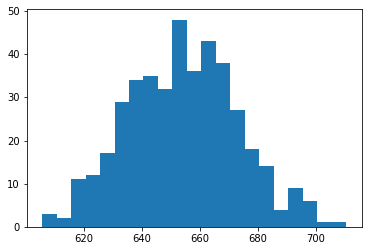

In [4]:
import numpy as np
# This is almost identical with above except the fact that it shows more details as the bin is not default
# It is set to 5 so it gives clearer picture about the data that we're dealing with
plt.hist(data.testscr, bins = np.arange(min(data.testscr), max(data.testscr)+5, 5))
plt.show()


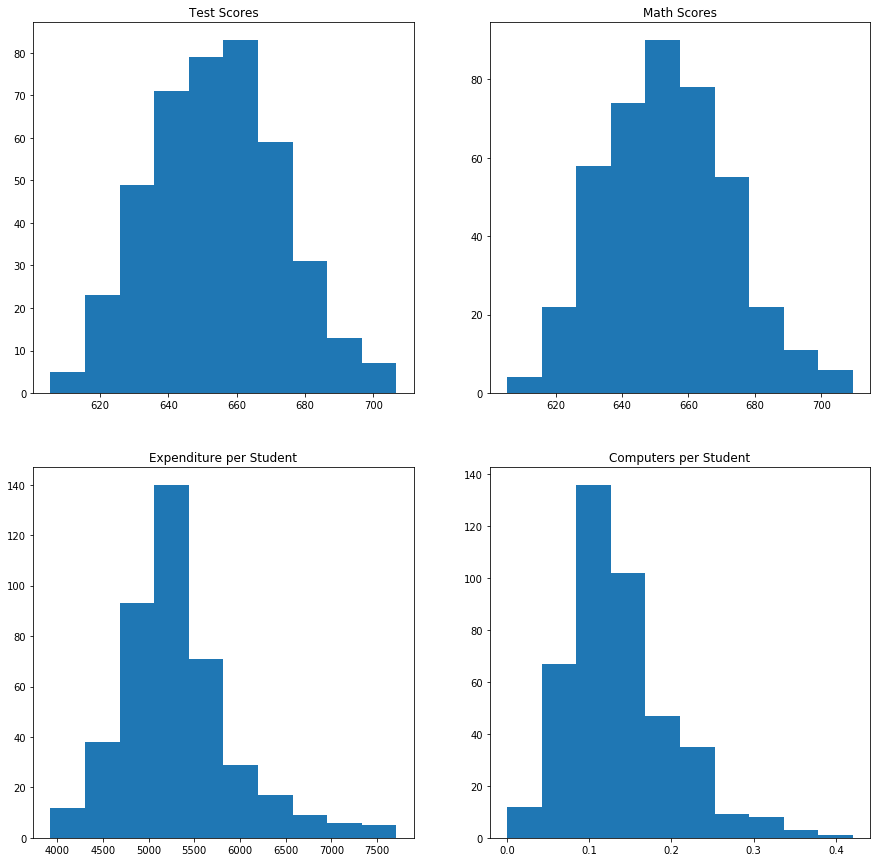

In [5]:
# This piece of code is to visualise the other variables that we have in the data
# figsize shows how big we want the charts and 2, 2 part shows how many we want (i.e. 2x2 charts)
f, axarr = plt.subplots(2, 2, figsize=(15,15))

axarr[0,0].hist(data.testscr)
axarr[0,0].set_title('Test Scores')

axarr[0,1].hist(data.math_scr)
axarr[0,1].set_title('Math Scores')

axarr[1,1].hist(data.comp_stu)
axarr[1,1].set_title('Computers per Student')

axarr[1,0].hist(data.expn_stu)
axarr[1,0].set_title('Expenditure per Student')

plt.show()

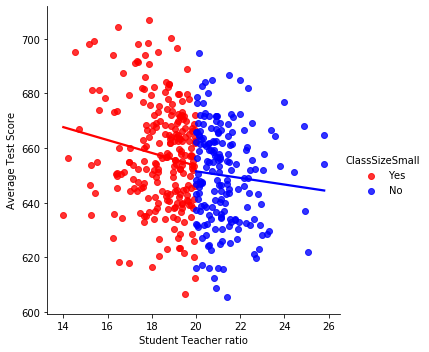

In [6]:
# Regression When X is a Binary Variable
# In here before doing linear regression with dummy/binary variable, I want to show the data
# by dividing the data into two subdivision
# If the class size is smaller than 20, we denote the class as 1 (or Yes) 
# but if the class size is bigger or equal to 20, we denote the class as 0 (or no)
# I also show the line of both of the subdivisions
import seaborn as sns
data['ClassSizeSmall'] = data['str'] < 20

converter = {0:'No', 1:'Yes'}
data.ClassSizeSmall = data.ClassSizeSmall.apply(lambda x: converter[x])

# This part of the code is very similar with what we have done in the previous chapter.
# We denote X and Y axes from the data and our cutoff condition is whether the class size is small or not
# palette part of the code merely paints the two subsamples into different colours
sns.lmplot(x='str', y='testscr', hue = 'ClassSizeSmall', data = data, ci=False, palette = {'Yes':'red','No':'blue'})

plt.xlabel('Student Teacher ratio')
plt.ylabel('Average Test Score')
sns.despine()
plt.show()

In [7]:
# This is our condition: if the str is smaller than 20, make it True and otherwise False
# In Python language True depicts for 1 and False depicts for 0
data['ClassSizeSmall'] = data['str'] < 20

# This is where we state to convert False to actually 0 and True to an actual 1. This is part may seem to be redundant but 
# for visualisation of our data, it is good
converter = {False:0, True:1}

# This is where we actually make the conversion in our data
data.ClassSizeSmall = data.ClassSizeSmall.apply(lambda x: converter[x])

# Now let's see our data. Note that the newly created dummy column is at the very end
data

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr,ClassSizeSmall
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000,1
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024,0
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024,1
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000,1
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671330,9.080333,13.857677,641.799988,639.900024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,416,68957,San Mateo,Las Lomitas Elementary,KK-08,984,59.730000,0.101600,3.556900,195,704.300049,0.198171,7290.338867,16.474134,28.716999,5.995935,700.900024,707.700012,1
416,417,69518,Santa Clara,Los Altos Elementary,KK-08,3724,208.479996,1.074100,1.503800,721,706.750000,0.193609,5741.462891,17.862625,41.734108,4.726101,704.000000,709.500000,1
417,418,72611,Ventura,Somis Union Elementary,KK-08,441,20.150000,3.563500,37.193802,45,645.000000,0.102041,4402.831543,21.885857,23.733000,24.263039,648.299988,641.700012,0
418,419,72744,Yuba,Plumas Elementary,KK-08,101,5.000000,11.881200,59.405899,14,672.200012,0.138614,4776.336426,20.200001,9.952000,2.970297,667.900024,676.500000,0


In [23]:
# Now we're going to be doing an actual
# We firstly import the library statsmodels.api for OLS with Binary Variable
import statsmodels.api as sm

# These steps are all explained before so we won't be diving into that again. 
x = data['ClassSizeSmall']
y = data['testscr']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     15.99
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           7.52e-05
Time:                        09:42:16   Log-Likelihood:                -1825.4
No. Observations:                 420   AIC:                             3655.
Df Residuals:                     418   BIC:                             3663.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            649.9788      1.388    468.380      0.000     647.251     652.707
ClassSizeSmall     7.3724      1.843      3.999      0.000       3.749      10.996
==============================================================================
Omnibus:                        3.061   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                2.448
Skew:                           0.052   Prob(JB):                        0.294
Kurtosis:                       2.641   Cond. No.                         2.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Now it is time for doing Heteroskedastic robust standard error OLS.
# Almost all the steps are the same except we add cov_type into the fit function and we make it equal to 'HC1'
x = data['ClassSizeSmall']
y = data['testscr']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit(cov_type='HC1')
predictions = model.predict(x)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     16.34
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           6.29e-05
Time:                        10:05:44   Log-Likelihood:                -1825.4
No. Observations:                 420   AIC:                             3655.
Df Residuals:                     418   BIC:                             3663.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            649.9788      1.323    491.332      0.000     647.386     652.572
ClassSizeSmall     7.3724      1.824      4.043      0.000       3.798      10.947
==============================================================================
Omnibus:                        3.061   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                2.448
Skew:                           0.052   Prob(JB):                        0.294
Kurtosis:                       2.641   Cond. No.                         2.81
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

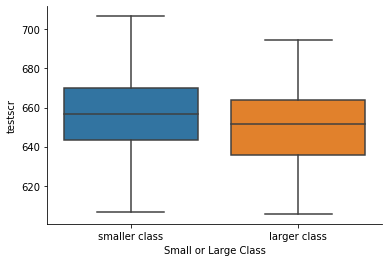

In [49]:
# This code is to see the separated data and how both of the subsamples are doing in terms of Testscr
# We have already separated the data so we do not need to do it again
# We change 0 to larger class and 1 to smaller class
converter = {0:"larger class", 1:"smaller class"}

# We put the data and the labels for the subsamples in here
data['classlabels'] = data.ClassSizeSmall.apply(lambda x: converter[x])
sns.boxplot(x="classlabels", y="testscr", data=data)

# This is what is going to write on the X axis
plt.xlabel('Small or Large Class')
sns.despine()

# print out the output
plt.show()

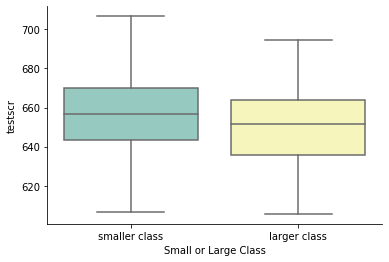

In [50]:
# This is the same but with different colours
converter = {0:"larger class", 1:"smaller class"}
data['classlabels'] = data.ClassSizeSmall.apply(lambda x: converter[x])
sns.boxplot(x="classlabels", y="testscr", data=data, palette='Set3')
plt.xlabel('Small or Large Class')
sns.despine()
plt.show()

In [51]:
# Now let's go to the Practice questions

In [60]:
#1
#a
import scipy.stats as st
print('The 95% CI for B1 is: {0:.4f} <= B1 <= {1:.4f}'.format(-5.82-(st.norm.ppf(1-(0.05/2))*2.21), -5.82+(st.norm.ppf(1-(0.05/2))*2.21)))
#b
t_act = -5.82/2.21
p_value = 2 * st.norm.cdf(-abs(t_act))
def function(x):
    if x < 0.05:
        print("We can reject the null hypothesis because the p-val is {:.4f}".format(p_value))
    else:
        print("We cannot reject the null hypothesis because the p-val is {:.4f}".format(p_value))
function(p_value)
#c
t_act = (5.82-5.6) / 2.21
p_value = 2 * st.norm.cdf(-abs(t_act))
function(p_value)
#d
print('The 99% CI for B0 is: {0:.4f} <= B0 <= {1:.4f}'.format(520.4-(st.norm.ppf(1-(0.01/2))*20.4), 520.4+(st.norm.ppf(1-(0.01/2))*20.4)))

The 95% CI for B1 is: -10.1515 <= B1 <= -1.4885
We can reject the null hypothesis because the p-val is 0.0085
We cannot reject the null hypothesis because the p-val is 0.9207
The 99% CI for B0 is: 467.8531 <= B1 <= 572.9469


In [75]:
#2
#a
print("The estimated gender gap equals to 2.12")
#b
t_act = 2.12 / 0.36
p_value = 2 * st.norm.cdf(-abs(t_act))
function(p_value)
#c
print('The 95% CI for B1 is: {0:.4f}, {1:.4f}'.format(2.12-(st.norm.ppf(1-(0.05/2))*0.36), 2.12+(st.norm.ppf(1-(0.05/2))*0.36)))
#d
print("Sample average wage of Women: {0}. Sample average wage of Men {1}".format(12.52, 12.52+2.12))

The estimated gender gap equals to 2.12
We can reject the null hypothesis because the p-val is 0.0000
The 95% CI is: 1.4144, 2.8256
Sample average wage of Women: 12.52. Sample average wage of Men 14.64


In [77]:
#3
print('The 99% CI is: {0:.4f}, {1:.4f}'.format(1.5*(3.94-(st.norm.ppf(1-(0.01/2))*0.31)), 1.5*(3.94+(st.norm.ppf(1-(0.01/2))*0.31))))

The 99% CI is: 4.7122, 7.1078


In [85]:
#4
#a
print("The worker's expected average hourly earnings: {:.4f}".format(-12.12 + 2.37*16))
#b
print("The worker's average hourly earnings expected to increase {:.4f}".format(2.37*2))
#c
t_act = (2.37 - (10/4)) / 0.1
p_value = 2 * st.norm.cdf(-abs(t_act))
function(p_value)
print('The 95% CI is: {0:.4f}, {1:.4f}'.format(4*(2.37-(st.norm.ppf(1-(0.05/2))*0.1)), 4*(2.37+(st.norm.ppf(1-(0.05/2))*0.10))))

The worker's expected average hourly earnings: 25.8000
The worker's average hourly earnings expected to increase 4.7400
We cannot reject the null hypothesis because the p-val is 0.1936
The 95% CI is: 8.6960, 10.2640


In [83]:
#5
#a is skipped
#b
t_act = 13.9 / 2.5
p_value = 2 * st.norm.cdf(-abs(t_act))
function(p_value)
#c
print('The 99% CI is: {0:.4f}, {1:.4f}'.format(13.9-(st.norm.ppf(1-(0.01/2))*2.5), 13.9+(st.norm.ppf(1-(0.01/2))*2.5)))

We can reject the null hypothesis because the p-val is 0.0000
The 99% CI is: 7.4604, 20.3396


In [84]:
#6 is explanation question - skipped

In [87]:
#7
#a
t_act = 3.12 / 1.5
p_value = 2 * st.norm.cdf(-abs(t_act))
function(p_value)
#b
print('The 95% CI is: {0:.4f}, {1:.4f}'.format(3.2-(st.norm.ppf(1-(0.05/2))*1.5), 3.2+(st.norm.ppf(1-(0.05/2))*1.5)))
#c and d is skipped because they're explanation questions

We can reject the null hypothesis because the p-val is 0.0375
The 95% CI is: 0.2601, 6.1399


In [109]:
#8
#a
print('The 95% CI is: {0:.4f}, {1:.4f}'.format(43.2-(st.t.ppf(1-(0.05/2), 30-2)*10.2), 43.2+(st.t.ppf(1-(0.05/2), 30-2)*10.2)))
#b
t_act = (61.5 - 55) / 7.4
p_value = 2 * st.t.cdf(-abs(t_act), 30-2)
function(p_value)
#c
print("The Critical Value for one sided is {}, that means we cannot reject the null hypothesis".format(st.t.ppf(1-0.05, 30-2)))


The 95% CI is: 22.3062, 64.0938
We cannot reject the null hypothesis because the p-val is 0.3872
The Critical Value for one sided is 1.701130934265931, that means we cannot reject the null hypothesis
